### Explorative Analyse der Smartmeter Daten

In [50]:
import sys
import os
import polars as pl
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
sys.path.append(os.path.abspath("../03_src"))

from data_loader import processed_data_load
path_to_file = "../02_data/processed/combined_data_cleaned.parquet"
df_cleaned = processed_data_load(path_to_file)
df_cleaned

✅ Processed Data geladen: 937456 Zeilen, 140 Spalten.


timestamp,timestamp_local,date,year_str,household_id,group_assignment,affects_timepoint,kwh_received_total,kwh_received_heatpump,kwh_received_other,kwh_returned_total,group,weather_id,installation_haspvsystem,protocols_available,protocols_hasmultiplevisits,protocols_reportids,metadata_available,smartmeterdata_available_15min,smartmeterdata_available_daily,smartmeterdata_available_monthly,temperature_avg_daily,temperature_max_daily,temperature_min_daily,heatingdegree_sia_daily,heatingdegree_us_daily,coolingdegree_us_daily,humidity_avg_daily,precipitation_total_daily,sunshine_duration_daily,timestamp_local_right,report_id,household_id_right,visit_year,visit_date,building_type,building_housingunits,…,heatpump_groundsource_currentpressure,heatpump_groundsource_currentpressure_okay,heatpump_groundsource_currenttemperature,heatpump_groundsource_currenttemperature_okay,heatpump_heatingcurvesetting_toohigh_beforevisit,heatpump_heatingcurvesetting_changed,heatpump_heatingcurvesetting_outside20_beforevisit,heatpump_heatingcurvesetting_outside0_beforevisit,heatpump_heatingcurvesetting_outsideminus8_beforevisit,heatpump_heatingcurvesetting_outside20_aftervisit,heatpump_heatingcurvesetting_outside0_aftervisit,heatpump_heatingcurvesetting_outsideminus8_aftervisit,heatpump_heatinglimitsetting_toohigh_beforevisit,heatpump_heatinglimitsetting_changed,heatpump_heatinglimitsetting_beforevisit,heatpump_heatinglimitsetting_aftervisit,heatpump_nightsetbacksetting_activated_beforevisit,heatpump_nightsetbacksetting_activated_aftervisit,dhw_temperaturesetting_categorization,dhw_temperaturesetting_changed,dhw_temperaturesetting_beforevisit,dhw_temperaturesetting_aftervisit,dhw_storage_lastdescaling_toolongago,dhw_storage_lastdescaling_year,heatdistribution_expansiontank_pressure_categorization,heatdistribution_expansiontank_pressure_actual,heatdistribution_expansiontank_pressure_target,heatdistribution_expansiontank_systemheight,heatdistribution_circulation_pumpstageposition_changed,heatdistribution_circulation_pumpstageposition_beforevisit,heatdistribution_circulation_pumpstageposition_aftervisit,heatdistribution_recommendation_insulatepipes,heatdistribution_recommendation_installthermostaticvalve,heatdistribution_recommendation_installrpmvalve,visit_date_date,year_str_right,swissix_base
"datetime[μs, UTC]","datetime[μs, Europe/Zurich]",date,str,str,str,str,f64,f64,f64,f64,str,str,bool,bool,bool,str,bool,bool,bool,bool,f64,f64,f64,f64,f64,f64,f64,f64,f64,"datetime[μs, Europe/Zurich]",i64,i64,i64,date,str,f64,…,f64,bool,f64,bool,bool,bool,f64,f64,f64,f64,f64,f64,bool,bool,i64,i64,bool,bool,str,bool,f64,i64,bool,i64,str,f64,f64,f64,bool,i64,i64,bool,bool,bool,date,str,f64
2019-03-02 23:59:59 UTC,2019-03-03 00:59:59 CET,2019-03-03,"""2019""","""100101""","""control""","""unknown""",18.33,null,null,8.64,"""control""","""z6I""",true,false,false,null,true,true,true,true,8.4,13.8,2.9,11.6,9.9,0.0,65.9,0.0,6.3,2019-03-03 00:00:00 CET,null,null,null,null,"""unknown""",null,…,null,false,null,false,false,false,null,null,null,null,null,null,false,false,null,null,false,false,"""Unbekannt""",false,null,null,false,null,"""Unbekannt""",null,null,null,false,null,null,false,false,false,null,null,22.79
2019-03-03 23:59:59 UTC,2019-03-04 00:59:59 CET,2019-03-04,"""2019""","""100101""","""control""","""unknown""",15.03,null,null,9.04,"""control""","""z6I""",true,false,false,null,true,true,true,true,7.8,13.8,5.0,12.2,10.5,0.0,54.2,2.6,1.3,2019-03-04 00:00:00 CET,null,null,null,null,"""unknown""",null,…,null,false,null,false,false,false,null,null,null,null,null,null,false,false,null,null,false,false,"""Unbekannt""",false,null,null,false,null,"""Unbekannt""",null,null,null,false,null,null,false,false,false,null,null,37.938333
2019-03-04 23:59:59 UTC,2019-03-05 00:59:59 CET,2019-03-05,"""2019""","""100101""","""control""","""unknown""",16.69,null,null,4.57,"""control""","""z6I""",true,false,false,null,true,true,true,true,7.4,11.9,2.7,12.6,10.9,0.0,55.5,0.2,7.7,2019-03-05 00:0

In [52]:
daily_normalized = (
    df_cleaned.group_by(pl.col("date")).agg([
        # Wir teilen die Summe durch die Anzahl der Haushalte, die an diesem Tag DA waren
        (pl.col("kwh_received_heatpump").sum() / pl.col("household_id").n_unique()).alias("avg_hp_per_h"),
        (pl.col("kwh_received_total").sum() / pl.col("household_id").n_unique()).alias("avg_total_per_h"),
        (pl.col("kwh_returned_total").sum() / pl.col("household_id").n_unique()).alias("avg_total_returned_per_h"),
        pl.col("temperature_avg_daily").mean().alias("avg_temp"),
        pl.col("swissix_base").mean().alias("avg_swissix_base")
    ])
    .drop_nulls()
    .sort("date")
)
daily_normalized

date,avg_hp_per_h,avg_total_per_h,avg_total_returned_per_h,avg_temp,avg_swissix_base
date,f64,f64,f64,f64,f64
2018-11-03,2.149669,32.66596,0.000265,4.106579,62.62
2018-11-04,2.013576,32.031192,0.000596,4.106579,51.558333
2018-11-05,1.97053,33.715762,0.000331,4.106579,65.679167
2018-11-06,2.126026,32.822649,0.000596,4.106579,57.92125
2018-11-07,2.035695,32.103179,0.000199,4.106579,58.779167
…,…,…,…,…,…
2024-03-17,0.121599,25.603894,5.251082,7.410457,60.337917
2024-03-18,0.121095,27.510469,2.356029,7.410469,81.739583
2024-03-19,0.117889,27.488179,0.827696,7.410977,84.41875


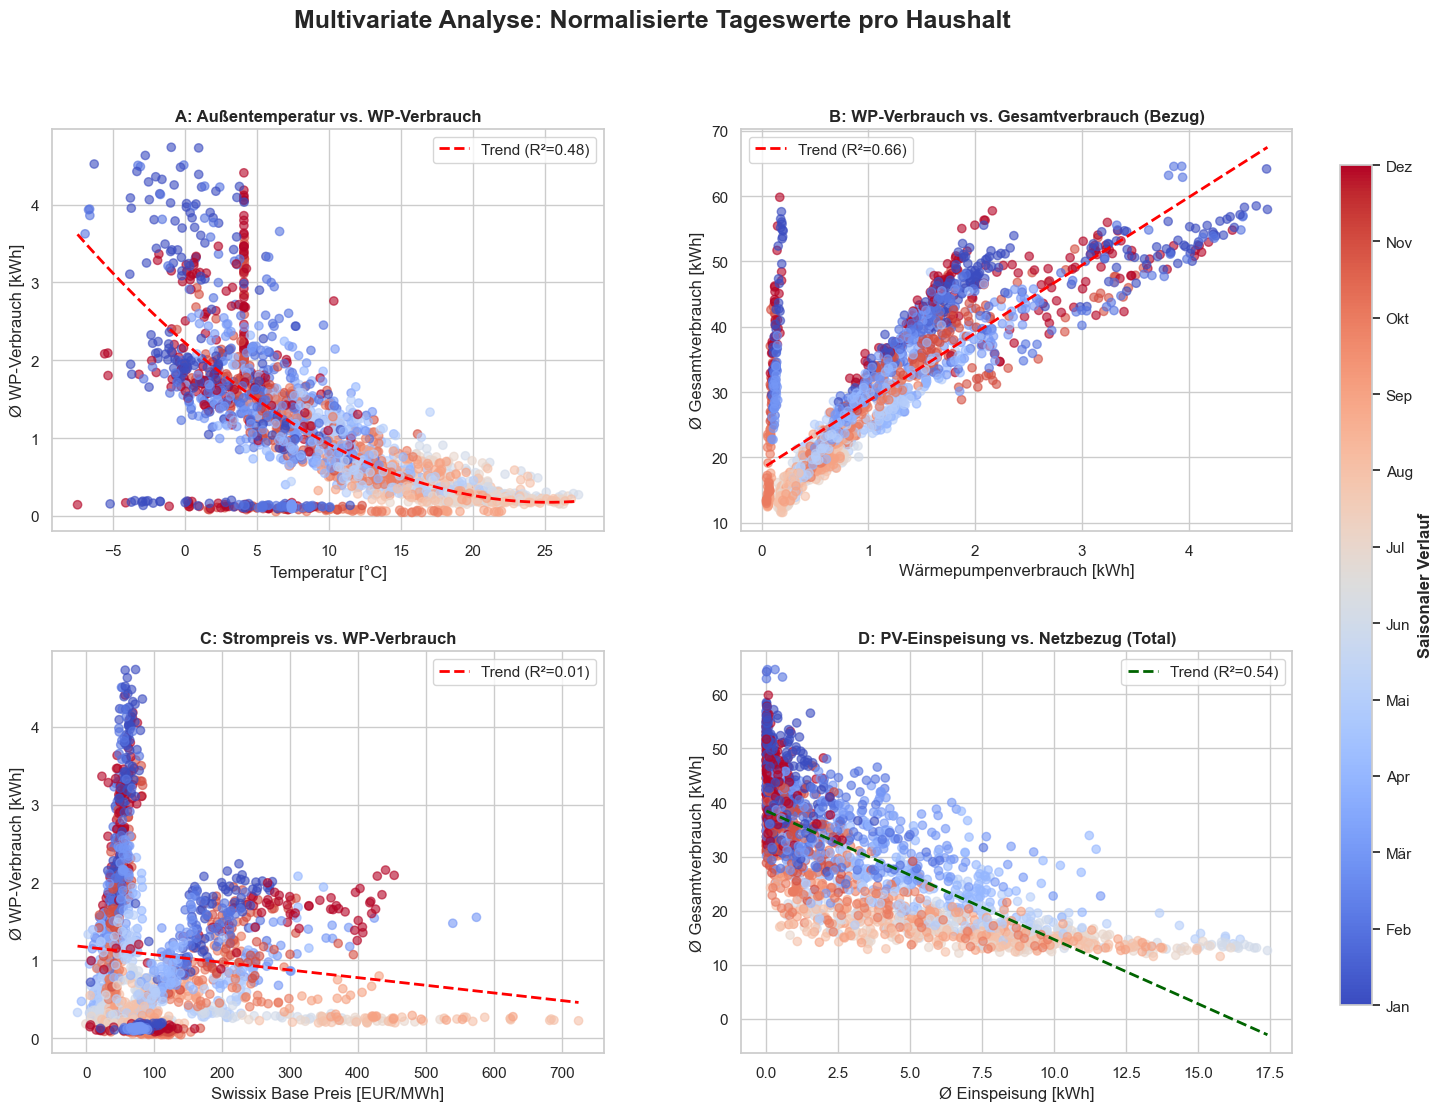

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import polars as pl

# Vorbereitung
df_plot = daily_normalized.with_columns(
    pl.col("date").dt.month().alias("month")
).drop_nulls()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Multivariate Analyse: Normalisierte Tageswerte pro Haushalt", fontsize=18, fontweight='bold')

# Farbschema für alle Plots einheitlich
cmap = 'coolwarm' 

def add_trendline(ax, x, y, degree=1, color="red"):
    # Berechnet Trendlinie und R^2
    z = np.polyfit(x, y, degree)
    p = np.poly1d(z)
    r_sq = np.corrcoef(x, y)[0, 1]**2
    x_range = np.linspace(x.min(), x.max(), 100)
    ax.plot(x_range, p(x_range), color=color, linestyle="--", linewidth=2, 
            label=f"Trend (R²={r_sq:.2f})")
    return p

# --- PLOT 1: Die Heizkurve ---
ax = axes[0, 0]
ax.scatter(df_plot["avg_temp"], df_plot["avg_hp_per_h"], c=df_plot["month"], cmap=cmap, alpha=0.6)
add_trendline(ax, df_plot["avg_temp"], df_plot["avg_hp_per_h"], degree=2) # Quadratisch für Physik
ax.set_title("A: Außentemperatur vs. WP-Verbrauch", fontweight='bold')
ax.set_xlabel("Temperatur [°C]")
ax.set_ylabel("Ø WP-Verbrauch [kWh]")
ax.legend()

# --- PLOT 2: Kopplung WP & Haus ---
ax = axes[0, 1]
ax.scatter(df_plot["avg_hp_per_h"], df_plot["avg_total_per_h"], c=df_plot["month"], cmap=cmap, alpha=0.6)
add_trendline(ax, df_plot["avg_hp_per_h"], df_plot["avg_total_per_h"])
ax.set_title("B: WP-Verbrauch vs. Gesamtverbrauch (Bezug)", fontweight='bold')
ax.set_xlabel("Wärmepumpenverbrauch [kWh]")
ax.set_ylabel("Ø Gesamtverbrauch [kWh]")
ax.legend()

# --- PLOT 3: Marktdynamik ---
ax = axes[1, 0]
ax.scatter(df_plot["avg_swissix_base"], df_plot["avg_hp_per_h"], c=df_plot["month"], cmap=cmap, alpha=0.6)
add_trendline(ax, df_plot["avg_swissix_base"], df_plot["avg_hp_per_h"])
ax.set_title("C: Strompreis vs. WP-Verbrauch", fontweight='bold')
ax.set_xlabel("Swissix Base Preis [EUR/MWh]")
ax.set_ylabel("Ø WP-Verbrauch [kWh]")
ax.legend()

# --- PLOT 4: PV-Effekt ---
ax = axes[1, 1]
ax.scatter(df_plot["avg_total_returned_per_h"], df_plot["avg_total_per_h"], c=df_plot["month"], cmap=cmap, alpha=0.6)
add_trendline(ax, df_plot["avg_total_returned_per_h"], df_plot["avg_total_per_h"], color="darkgreen")
ax.set_title("D: PV-Einspeisung vs. Netzbezug (Total)", fontweight='bold')
ax.set_xlabel("Ø Einspeisung [kWh]")
ax.set_ylabel("Ø Gesamtverbrauch [kWh]")
ax.legend()

# --- COLORBAR SETUP ---
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=1, vmax=12))
sm.set_array([])
cbar_ax = fig.add_axes([0.93, 0.15, 0.02, 0.7])
cbar = fig.colorbar(sm, cax=cbar_ax)
month_names = ['Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez']
cbar.set_ticks(np.linspace(1, 12, 12))
cbar.set_ticklabels(month_names)
cbar.set_label('Saisonaler Verlauf', fontsize=12, fontweight='bold')

plt.subplots_adjust(right=0.9, hspace=0.3, wspace=0.25)
plt.show()

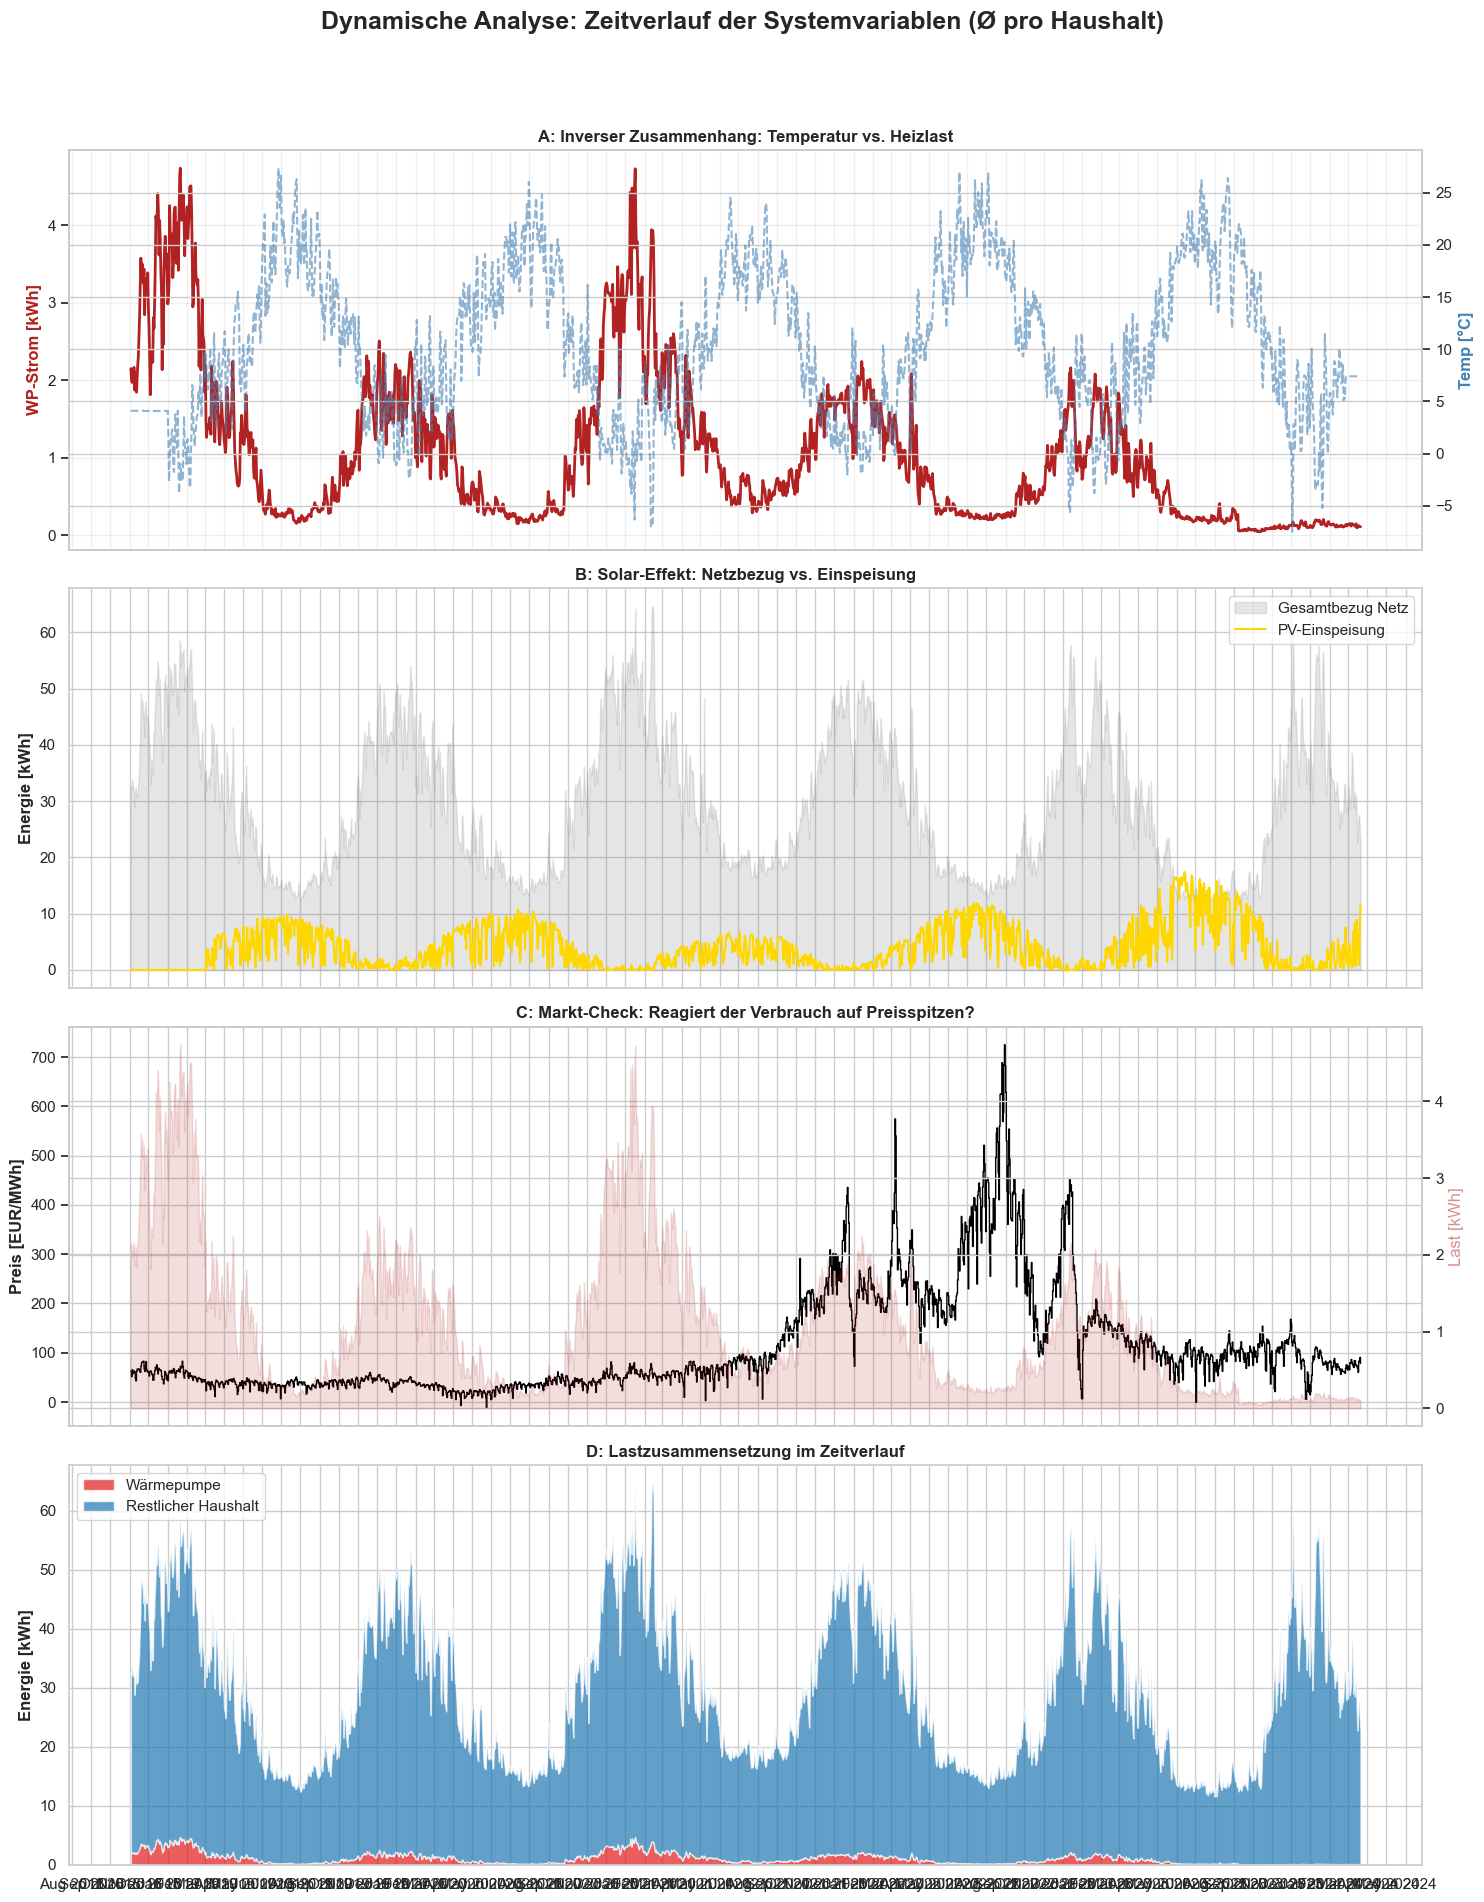

In [59]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1. Daten sicherstellen
df_line = daily_normalized.sort("date")

# 2. Layout: 4 Subplots untereinander
fig, axes = plt.subplots(4, 1, figsize=(15, 20), sharex=True)
fig.suptitle("Dynamische Analyse: Zeitverlauf der Systemvariablen (Ø pro Haushalt)", fontsize=18, fontweight='bold')

# --- PLOT 1: Thermische Kopplung (Physik) ---
ax1 = axes[0]
ax1_tw = ax1.twinx()
lns1 = ax1.plot(df_line["date"], df_line["avg_hp_per_h"], color='firebrick', label="Ø WP-Verbrauch", linewidth=2)
lns2 = ax1_tw.plot(df_line["date"], df_line["avg_temp"], color='steelblue', label="Außentemperatur", alpha=0.6, linestyle='--')
ax1.set_ylabel("WP-Strom [kWh]", color='firebrick', fontweight='bold')
ax1_tw.set_ylabel("Temp [°C]", color='steelblue', fontweight='bold')
ax1.set_title("A: Inverser Zusammenhang: Temperatur vs. Heizlast", fontweight='bold')
ax1.grid(True, alpha=0.3)

# --- PLOT 2: PV-Interaktion (Eigenstrom vs. Netz) ---
ax2 = axes[1]
ax2.fill_between(df_line["date"], df_line["avg_total_per_h"], color="gray", alpha=0.2, label="Gesamtbezug Netz")
ax2.plot(df_line["date"], df_line["avg_total_returned_per_h"], color="gold", label="PV-Einspeisung", linewidth=1.5)
ax2.set_ylabel("Energie [kWh]", fontweight='bold')
ax2.set_title("B: Solar-Effekt: Netzbezug vs. Einspeisung", fontweight='bold')
ax2.legend(loc='upper right')

# --- PLOT 3: Markt-Dynamik (Preis vs. Verhalten) ---
ax3 = axes[2]
ax3_tw = ax3.twinx()
ax3.step(df_line["date"], df_line["avg_swissix_base"], color='black', where='post', label="Börsenpreis (Swissix)", linewidth=1)
ax3_tw.fill_between(df_line["date"], df_line["avg_hp_per_h"], color='firebrick', alpha=0.15, label="WP-Last")
ax3.set_ylabel("Preis [EUR/MWh]", fontweight='bold')
ax3_tw.set_ylabel("Last [kWh]", color='firebrick', alpha=0.5)
ax3.set_title("C: Markt-Check: Reagiert der Verbrauch auf Preisspitzen?", fontweight='bold')

# --- PLOT 4: Haushalts-Splitting ---
ax4 = axes[3]
# Wir berechnen das Delta (Restlicher Haushaltsstrom)
df_line = df_line.with_columns((pl.col("avg_total_per_h") - pl.col("avg_hp_per_h")).alias("rest_load"))
ax4.stackplot(df_line["date"], [df_line["avg_hp_per_h"], df_line["rest_load"]], 
              labels=['Wärmepumpe', 'Restlicher Haushalt'], colors=['#e31a1c', '#1f78b4'], alpha=0.7)
ax4.set_ylabel("Energie [kWh]", fontweight='bold')
ax4.set_title("D: Lastzusammensetzung im Zeitverlauf", fontweight='bold')
ax4.legend(loc='upper left')

# Zeitachsen-Formatierung
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


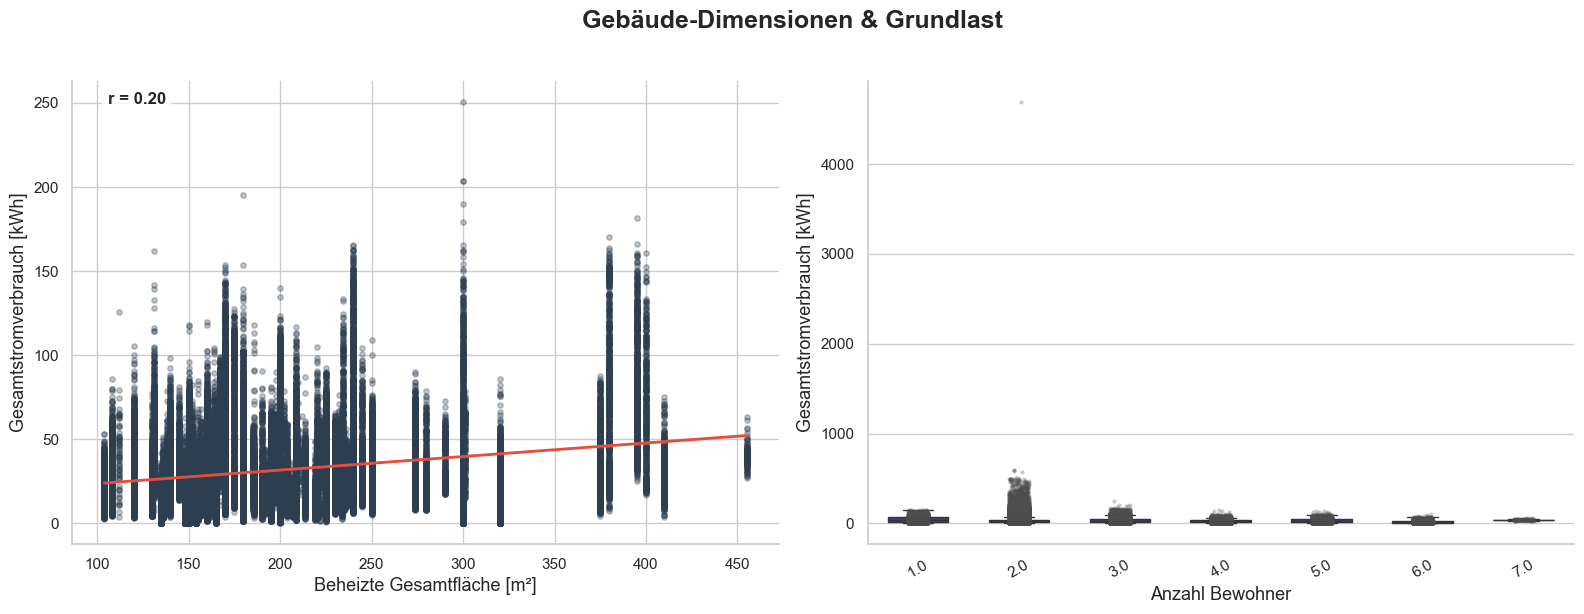

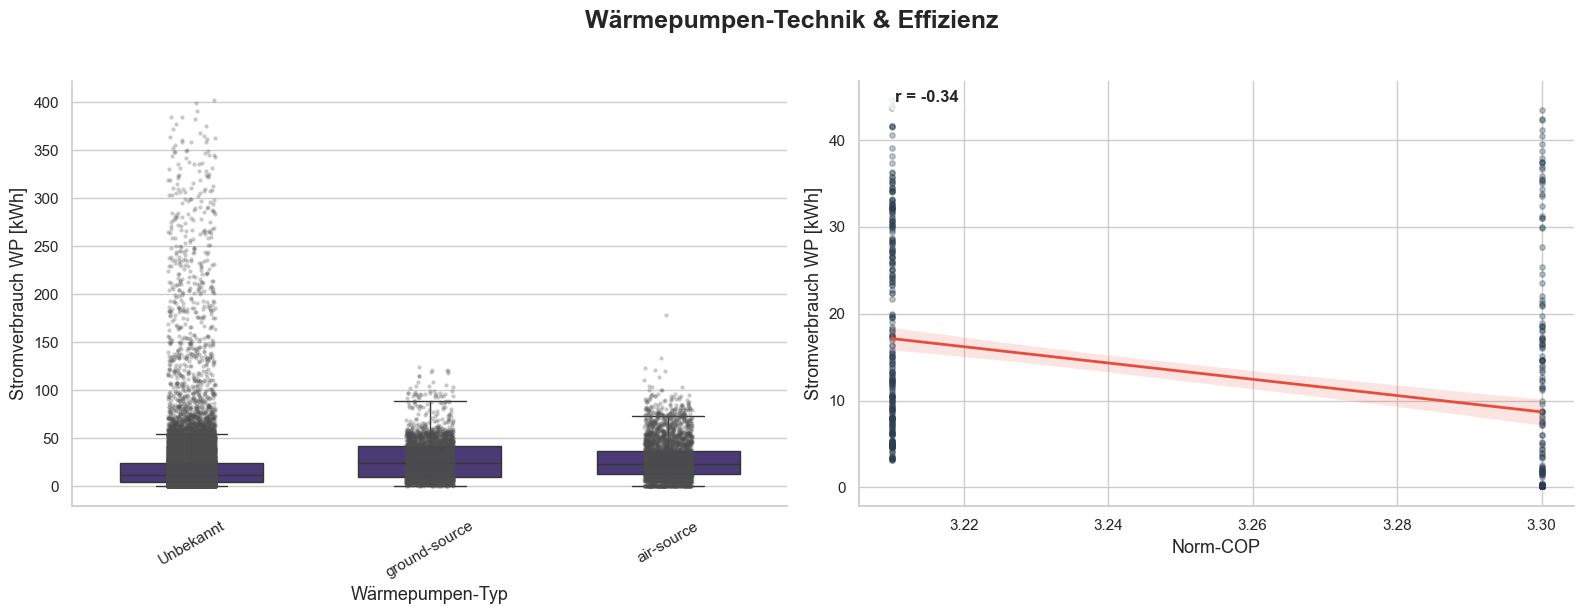

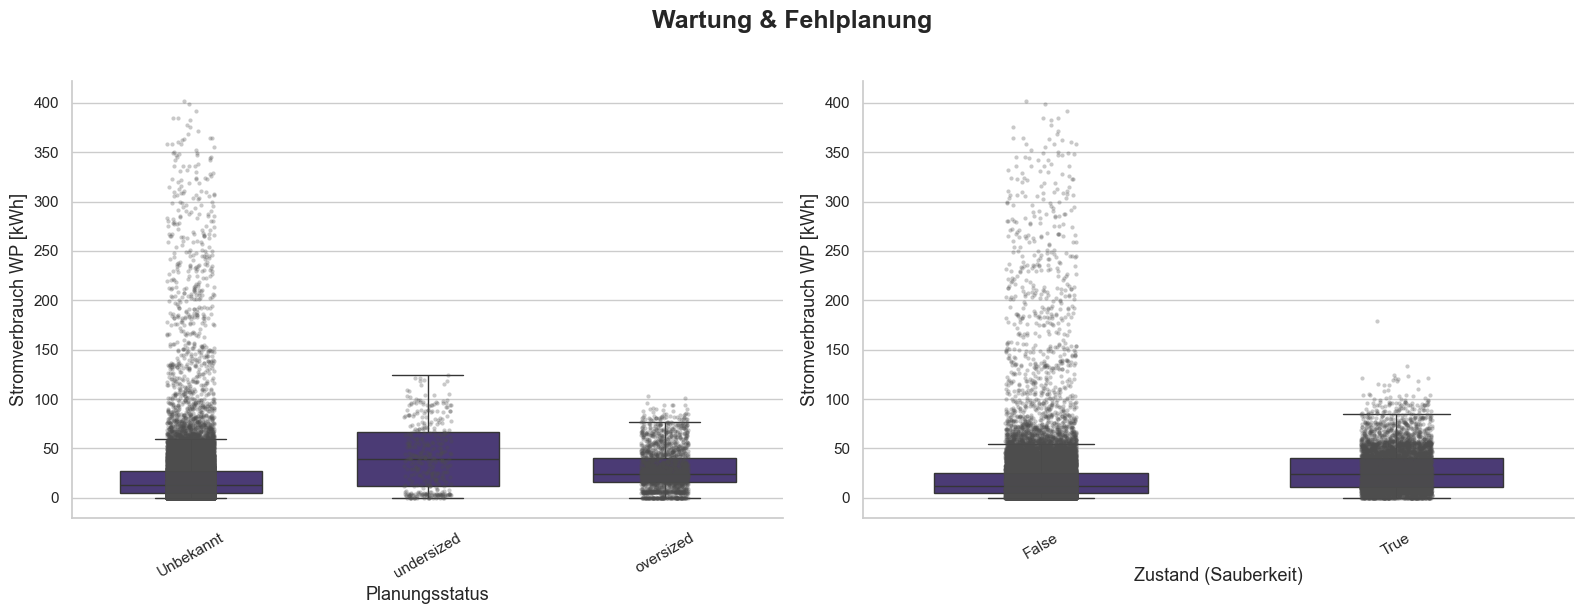

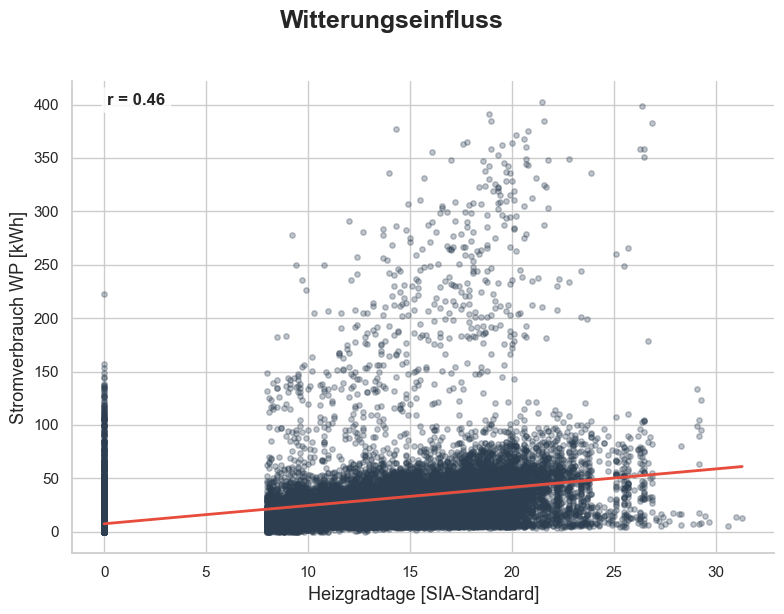

In [62]:
def create_bivariate_plots(df):
    # Globales Styling
    sns.set_theme(style="whitegrid", palette="viridis")
    
    label_map = {
        "building_floorareaheated_total": "Beheizte Gesamtfläche [m²]",
        "kwh_received_total": "Gesamtstromverbrauch [kWh]",
        "building_residents": "Anzahl Bewohner",
        "heatpump_installation_type": "Wärmepumpen-Typ",
        "kwh_received_heatpump": "Stromverbrauch WP [kWh]",
        "heatpump_installation_normpoint_cop": "Norm-COP",
        "heatpump_installation_incorrectlyplanned_categorization": "Planungsstatus",
        "heatpump_clean": "Zustand (Sauberkeit)",
        "heatingdegree_sia_daily": "Heizgradtage [SIA-Standard]"
    }

    analysis_groups = [
        {"title": "Gebäude-Dimensionen & Grundlast", 
         "pairs": [("building_floorareaheated_total", "kwh_received_total", "scatter"), 
                   ("building_residents", "kwh_received_total", "box")]},
        {"title": "Wärmepumpen-Technik & Effizienz", 
         "pairs": [("heatpump_installation_type", "kwh_received_heatpump", "box"), 
                   ("heatpump_installation_normpoint_cop", "kwh_received_heatpump", "scatter")]},
        {"title": "Wartung & Fehlplanung", 
         "pairs": [("heatpump_installation_incorrectlyplanned_categorization", "kwh_received_heatpump", "box"), 
                   ("heatpump_clean", "kwh_received_heatpump", "box")]},
        {"title": "Witterungseinfluss", 
         "pairs": [("heatingdegree_sia_daily", "kwh_received_heatpump", "scatter")]}
    ]

    for group in analysis_groups:
        num_plots = len(group["pairs"])
        fig, axes = plt.subplots(1, num_plots, figsize=(8 * num_plots, 6), squeeze=False)
        
        fig.suptitle(group["title"], fontsize=18, fontweight='bold', y=1.02)

        for i, (x_col, y_col, ptype) in enumerate(group["pairs"]):
            ax = axes[0, i]
            # Daten für den Plot vorbereiten (Pandas für Seaborn Kompatibilität)
            plot_df = df.select([x_col, y_col]).drop_nulls().to_pandas()
            
            if ptype == "scatter":
                # Scatterplot mit Regressionslinie
                sns.regplot(data=plot_df, x=x_col, y=y_col, ax=ax, 
                            scatter_kws={'alpha':0.3, 's':15, 'color':'#2c3e50'},
                            line_kws={'color':'#e74c3c', 'lw':2})
                
                corr_val = plot_df[x_col].corr(plot_df[y_col])
                ax.annotate(f'r = {corr_val:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',
                            fontsize=12, fontweight='bold', bbox=dict(boxstyle="round", fc="w", alpha=0.8))

            elif ptype == "box":
                # Modernisierter Boxplot (kombiniert mit Stripplot für Datenpunkte)
                sns.boxplot(data=plot_df, x=x_col, y=y_col, ax=ax, showfliers=False, width=0.6)
                sns.stripplot(data=plot_df, x=x_col, y=y_col, ax=ax, color=".3", size=3, alpha=0.3)
                
                ax.tick_params(axis='x', rotation=30)

            # Polishing
            ax.set_xlabel(label_map.get(x_col, x_col), fontsize=13, fontweight='medium')
            ax.set_ylabel(label_map.get(y_col, y_col), fontsize=13, fontweight='medium')
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)

        plt.tight_layout()
        plt.show()

create_bivariate_plots(df_cleaned)

C:\Users\maxkr\AppData\Local\Temp\ipykernel_24584\2950758596.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette=colors)


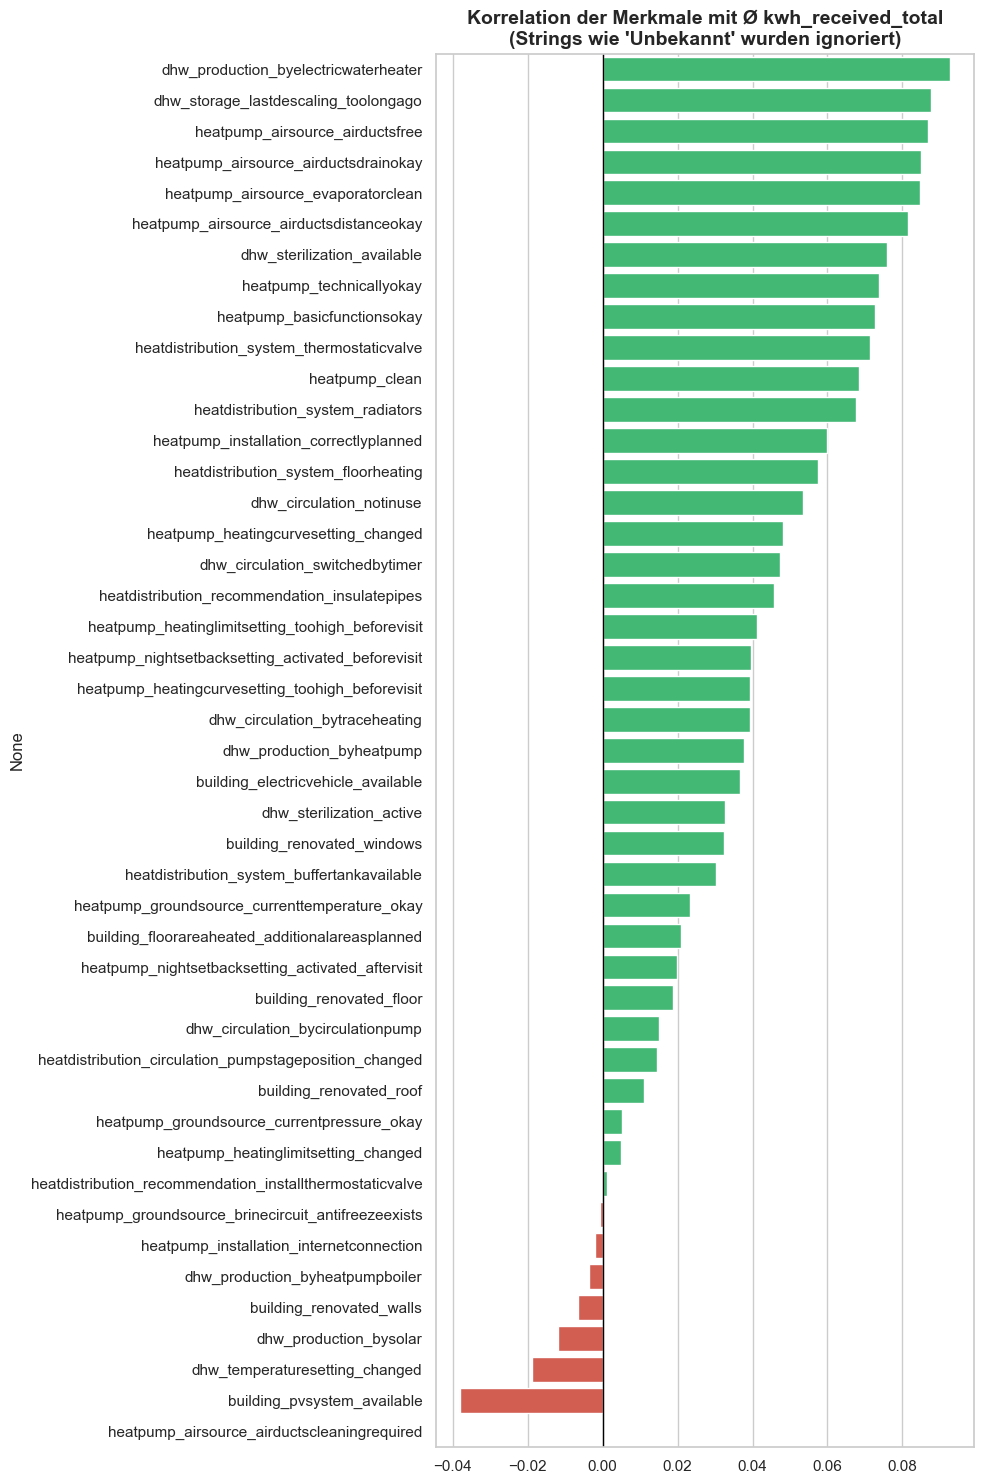

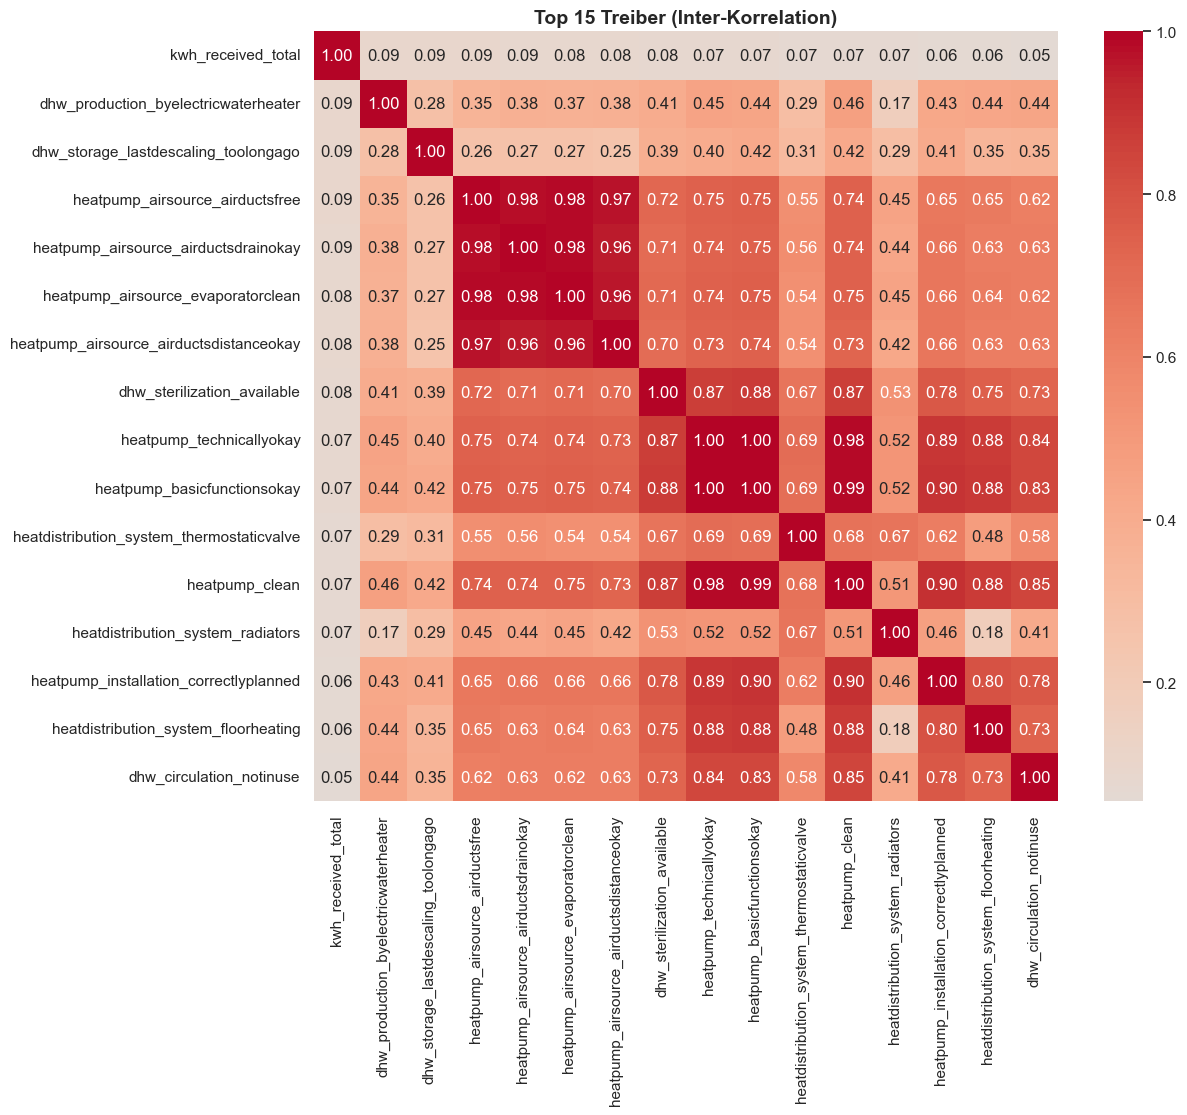

In [68]:
def plot_extensive_correlation(df: pl.DataFrame, target_col="kwh_received_total"):
    # 1. Liste der gewünschten Features (deine Liste von oben)
    features = [
       'building_renovated_windows', 'building_renovated_roof', 'building_renovated_walls', 
    'building_renovated_floor', 'building_floorareaheated_additionalareasplanned', 
    'building_pvsystem_available', 'building_electricvehicle_available', 
    'heatpump_installation_internetconnection', 'heatdistribution_system_radiators', 
    'heatdistribution_system_floorheating', 'heatdistribution_system_thermostaticvalve', 
    'heatdistribution_system_buffertankavailable', 'dhw_production_byheatpump', 
    'dhw_production_byelectricwaterheater', 'dhw_production_bysolar', 
    'dhw_production_byheatpumpboiler', 'dhw_circulation_notinuse', 
    'dhw_circulation_bytraceheating', 'dhw_circulation_bycirculationpump', 
    'dhw_circulation_switchedbytimer', 'dhw_sterilization_available', 
    'dhw_sterilization_active', 'heatpump_clean', 'heatpump_basicfunctionsokay', 
    'heatpump_technicallyokay', 'heatpump_installation_correctlyplanned', 
    'heatpump_airsource_airductsdistanceokay', 'heatpump_airsource_airductsfree', 
    'heatpump_airsource_airductscleaningrequired', 'heatpump_airsource_airductsdrainokay', 
    'heatpump_airsource_evaporatorclean', 'heatpump_groundsource_brinecircuit_antifreezeexists', 
    'heatpump_groundsource_currentpressure_okay', 'heatpump_groundsource_currenttemperature_okay', 
    'heatpump_heatingcurvesetting_toohigh_beforevisit', 'heatpump_heatingcurvesetting_changed', 
    'heatpump_heatinglimitsetting_toohigh_beforevisit', 'heatpump_heatinglimitsetting_changed', 
    'heatpump_nightsetbacksetting_activated_beforevisit', 'heatpump_nightsetbacksetting_activated_aftervisit', 
    'dhw_temperaturesetting_changed', 'dhw_storage_lastdescaling_toolongago', 
    'heatdistribution_circulation_pumpstageposition_changed', 'heatdistribution_recommendation_insulatepipes', 
    'heatdistribution_recommendation_installthermostaticvalve',
    ]

    # Nur Spalten nehmen, die im DF existieren
    existing_features = [f for f in features if f in df.columns]
    
    # 2. Aggregation auf Haushaltsebene
    df_hh = (
        df.group_by("household_id")
        .agg([
            pl.col(target_col).mean().alias(target_col),
            *[pl.col(f).first().alias(f) for f in existing_features]
        ])
    )

    # 3. Datentypen-Bereinigung (DAS IST DER FIX)
    # Wir nehmen NUR numerische Spalten und Booleans (die wir zu Int konvertieren)
    # Strings (wie 'Unbekannt') fliegen hier raus.
    numeric_cols = []
    for col in df_hh.columns:
        dtype = df_hh[col].dtype
        if dtype in [pl.Float64, pl.Float32, pl.Int64, pl.Int32, pl.Boolean]:
            numeric_cols.append(col)
    
    # DataFrame filtern und Booleans zu 0/1 machen
    df_numeric = df_hh.select([
        pl.col(c).cast(pl.Int64) if df_hh[c].dtype == pl.Boolean else pl.col(c)
        for c in numeric_cols
    ]).drop_nulls()

    # 4. Korrelation berechnen (mit Pandas für Seaborn)
    corr_matrix = df_numeric.to_pandas().corr()
    
    # Sicherstellen, dass target_col noch da ist
    if target_col not in corr_matrix.columns:
        print(f"Warnung: {target_col} konnte nicht korreliert werden (evtl. nur Nullwerte?).")
        return

    correlations = corr_matrix[target_col].drop(target_col).sort_values(ascending=False)

    # --- PLOT 1: Bar-Ranking ---
    plt.figure(figsize=(10, 15))
    # Farben: Grün für positive, Rot für negative Korrelation
    colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in correlations.values]
    sns.barplot(x=correlations.values, y=correlations.index, palette=colors)
    plt.axvline(0, color='black', lw=1)
    plt.title(f"Korrelation der Merkmale mit Ø {target_col}\n(Strings wie 'Unbekannt' wurden ignoriert)", 
              fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # --- PLOT 2: Heatmap Top 15 ---
    top_15 = correlations.abs().sort_values(ascending=False).head(15).index.tolist()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix.loc[[target_col] + top_15, [target_col] + top_15], 
                annot=True, cmap="coolwarm", center=0, fmt=".2f")
    plt.title("Top 15 Treiber (Inter-Korrelation)", fontsize=14, fontweight='bold')
    plt.show()

# Aufruf
plot_extensive_correlation(df_cleaned)

In [66]:
plot_extensive_correlation(df_cleaned)

ValueError: could not convert string to float: 'Unbekannt'